In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud_math.rename(columns={'studytime, granular':'granular'}, inplace = True)
column = stud_math.columns


num_column = list(stud_math.select_dtypes(include=['float64', 'int64']).columns)
obj_column = list(stud_math.select_dtypes(include=['object']).columns)


In [4]:
def column_change_type(col):
    if col in num_column:
        obj_column.append(col)
        num_column.remove(col)
    elif col in obj_column:
        num_column.append(col)
        obj_column.drop(col)

In [54]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1: # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [6]:
def unique_values(col):
    print(f'Unique values in {col} {stud_math[col].unique()}')

In [7]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [8]:
def fill_na_mode(column):
    column.fillna(column.mode()[0],  inplace=True) 

In [9]:
def na_count(column):
    print(f'NaN in {column} {stud_math.loc[:,column].isna().sum()}', )

In [52]:
stud_math.dropna(subset=['score'], inplace=True)

In [10]:
for col in num_column:
    na_count(col)

NaN in age 0
NaN in Medu 3
NaN in Fedu 24
NaN in traveltime 28
NaN in studytime 7
NaN in failures 22
NaN in granular 7
NaN in famrel 27
NaN in freetime 11
NaN in goout 8
NaN in health 15
NaN in absences 12
NaN in score 6


In [11]:
def num_column_hist (column):
    fid, ax = plt.subplots(figsize = (4, 4))
    ax.set_title(f'Hist for {column}')
    stud_math[column].hist()
    plt.show()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


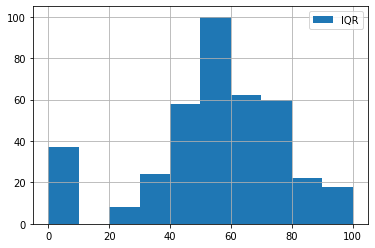

In [13]:
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();

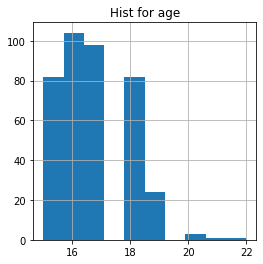

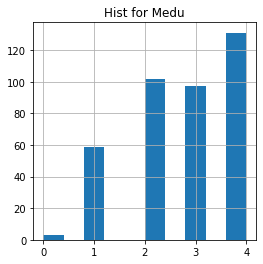

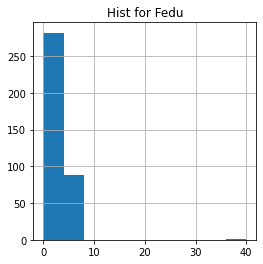

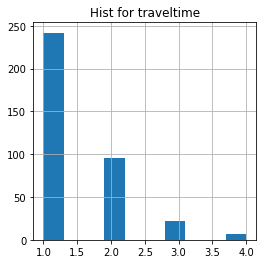

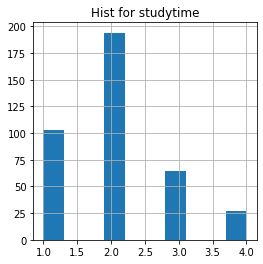

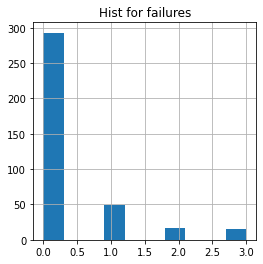

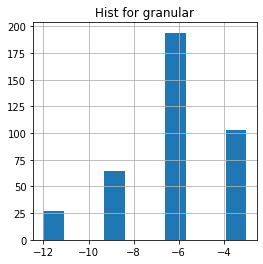

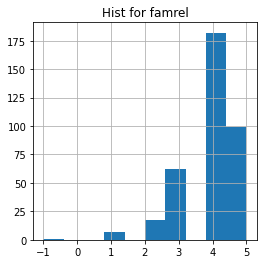

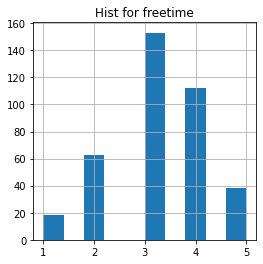

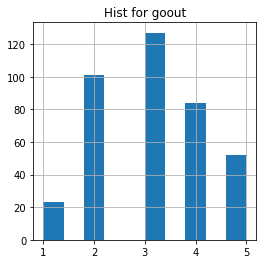

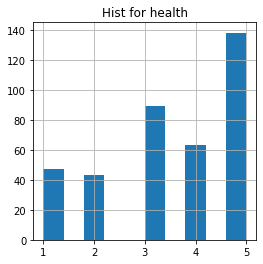

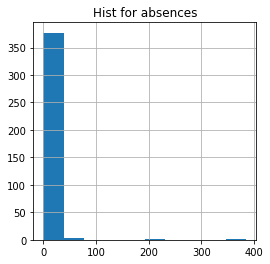

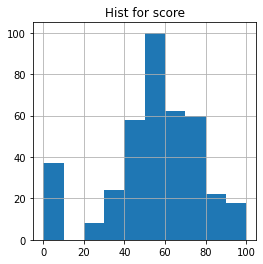

In [16]:
for col in num_column:
    num_column_hist(col)

По гистограмам можно увидеть, что есть странные значения в колонке Fedu. В колонке traveltime видно, что большинство учеников живут в 15 минутах от дома и можно переделать колонку в категориальный признак <15 минут до школы. Колнка failures выглядит позозрительной из-за ее возможных значений, посмотрим, что будет дальше. В famrel есть отрицательное значение, необходимо изменить его, так как шкала от 1 до 5. В absences есть выбросы.

In [17]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Видим, что модуль кореляции между granular и studytime = 1, поэтому можно без потери данных убрать колнонку granular

In [18]:
stud_math.drop(['granular'], inplace = True, axis = 1)
num_column.remove('granular')

In [19]:
stud_math = stud_math.loc[stud_math.Fedu <= 4]

In [20]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 'L15' if x <=1 else 'G15')

In [21]:
column_change_type('traveltime')

In [22]:
stud_math.groupby(['failures'])['score'].mean()

failures
0.0    55.967153
1.0    39.659091
2.0    34.615385
3.0    29.642857
Name: score, dtype: float64

In [23]:
fill_na_mode(stud_math['failures'])

In [24]:
stud_math = stud_math.loc[stud_math.famrel >= 1]

In [ ]:
for col in ['famrel', 'freetime', 'goout', 'health']:
    column_change_type(col)

In [25]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

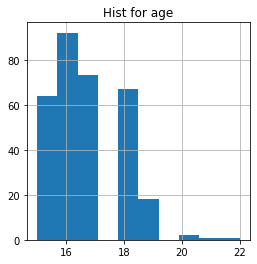

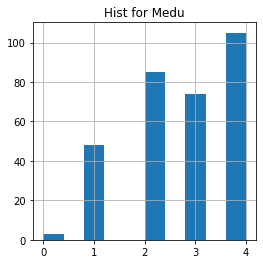

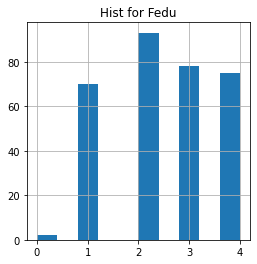

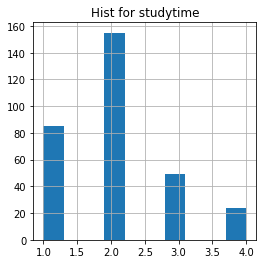

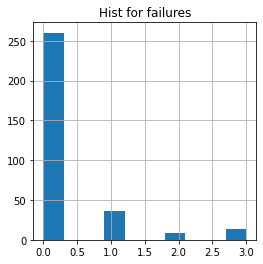

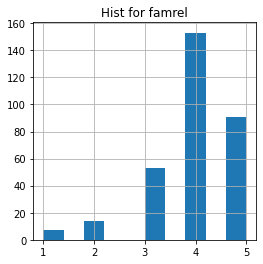

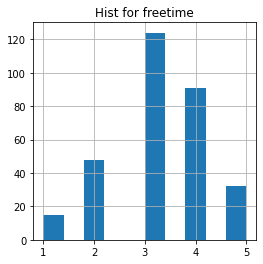

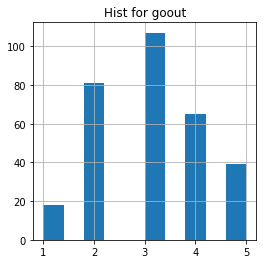

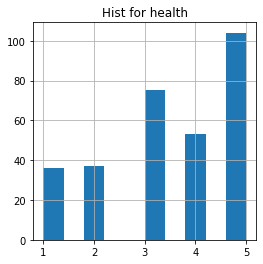

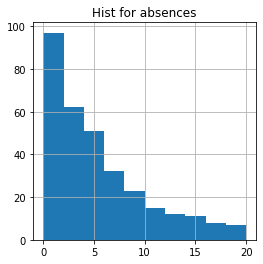

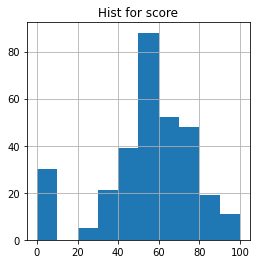

In [26]:
for col in num_column:
    num_column_hist(col)

In [27]:
stud_math.corr()

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176250,-0.193469,-0.015188,0.223053,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
Medu,-0.176250,1.000000,0.647425,0.096564,-0.240917,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
Fedu,-0.193469,0.647425,1.000000,0.003729,-0.276113,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
studytime,-0.015188,0.096564,0.003729,1.000000,-0.137135,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.223053,-0.240917,-0.276113,-0.137135,1.000000,0.025136,0.112366,0.073886,0.067006,0.062939,-0.303237
famrel,0.058482,-0.034579,-0.040042,0.018273,0.025136,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
freetime,0.045144,0.006825,-0.018485,-0.141048,0.112366,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
goout,0.097906,0.056204,0.011471,-0.048134,0.073886,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803
health,-0.061147,-0.079287,0.007139,-0.102211,0.067006,0.096186,0.074485,-0.008117,1.000000,-0.003061,-0.046172
absences,0.138921,0.102861,-0.009144,-0.069378,0.062939,-0.061762,0.100271,0.061950,-0.003061,1.000000,0.107494


In [56]:
for col in obj_column:
    na_count(col)

NaN in school 0
NaN in sex 0
NaN in address 0
NaN in famsize 0
NaN in Pstatus 0
NaN in Mjob 0
NaN in Fjob 0
NaN in reason 0
NaN in guardian 0
NaN in schoolsup 0
NaN in famsup 0
NaN in paid 0
NaN in activities 0
NaN in nursery 0
NaN in higher 0
NaN in internet 0
NaN in romantic 0
NaN in traveltime 0
NaN in famrel 0
NaN in freetime 0
NaN in goout 0
NaN in health 0


In [39]:
for col in obj_column:
    unique_values(col)

Unique values in school ['GP' 'MS']
Unique values in sex ['F' 'M']
Unique values in address ['U' 'R']
Unique values in famsize ['GT3' 'LE3']
Unique values in Pstatus ['A' 'T']
Unique values in Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in Fjob ['teacher' 'other' 'health' 'services' 'at_home']
Unique values in reason ['course' 'other' 'home' 'reputation']
Unique values in guardian ['mother' 'father' 'other']
Unique values in schoolsup ['yes' 'no']
Unique values in famsup ['no' 'yes']
Unique values in paid ['no' 'yes']
Unique values in activities ['no' 'yes']
Unique values in nursery ['yes' 'no']
Unique values in higher ['yes' 'no']
Unique values in internet ['yes' 'no']
Unique values in romantic ['no' 'yes']
Unique values in traveltime ['G15' 'L15']
Unique values in famrel [4. 5. 3. 2. 1.]
Unique values in freetime [ 3.  2.  4.  1.  5. nan]
Unique values in goout [ 4.  3.  2.  1.  5. nan]
Unique values in health [ 3.  5.  1.  2.  4. nan]


In [40]:
for col in obj_column:
    fill_na_mode(stud_math[col])

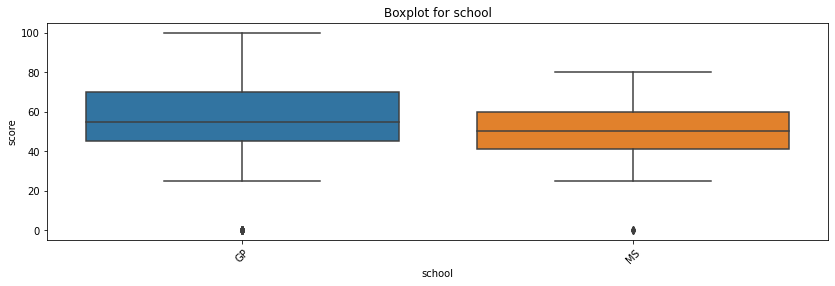

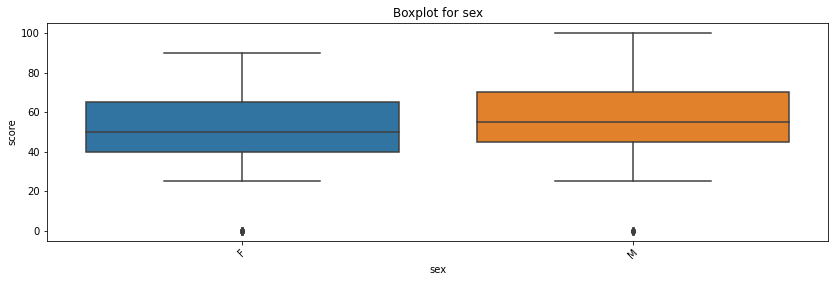

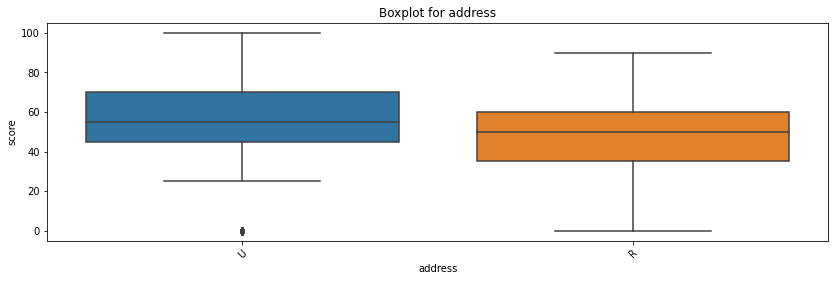

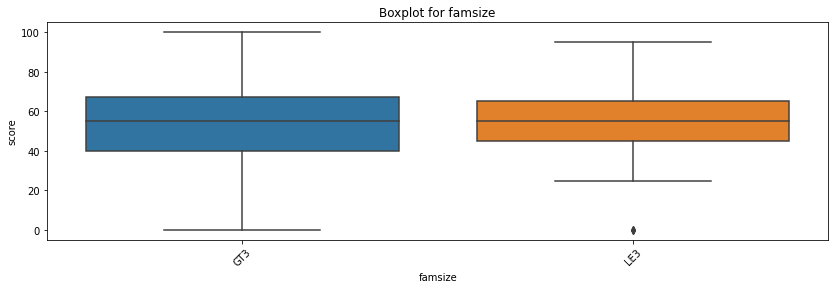

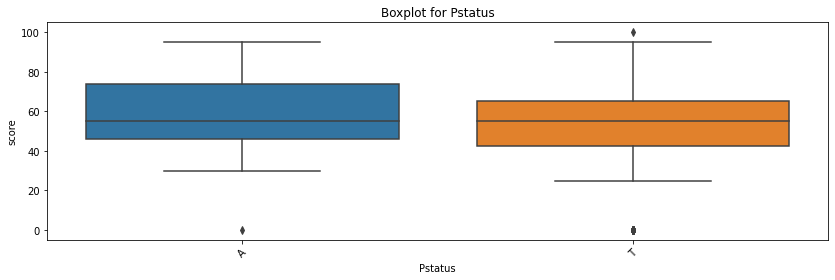

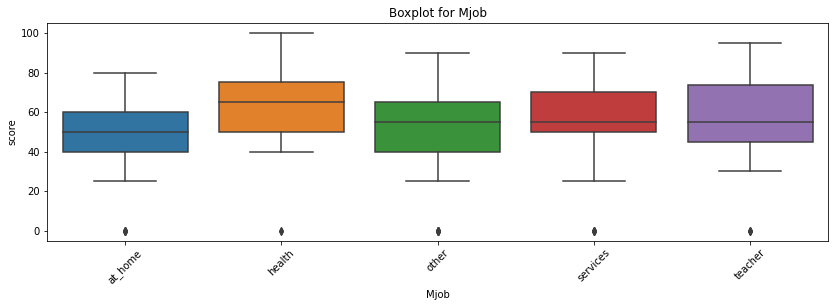

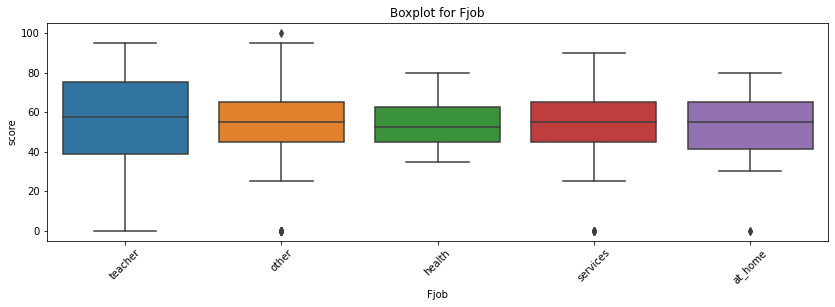

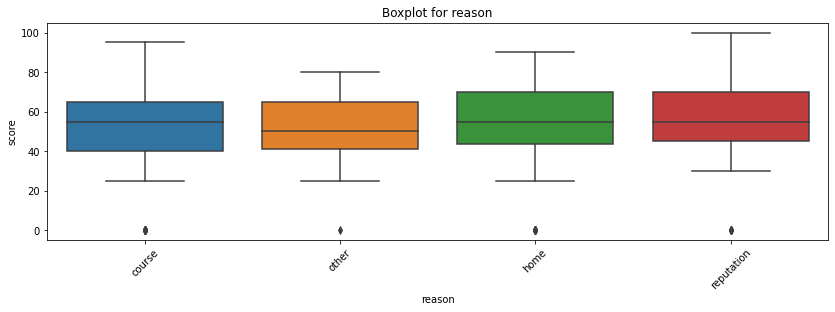

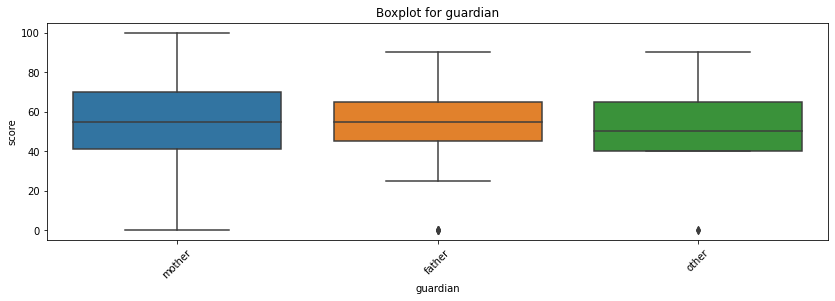

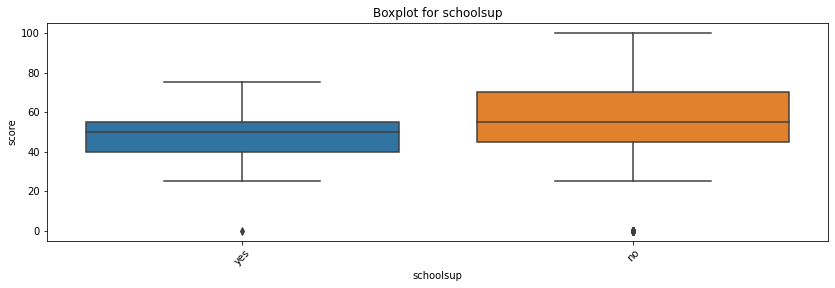

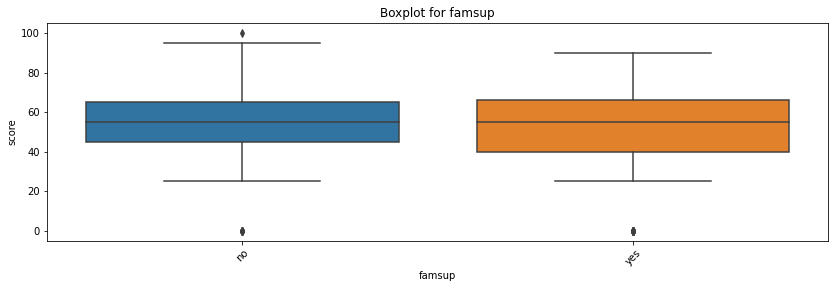

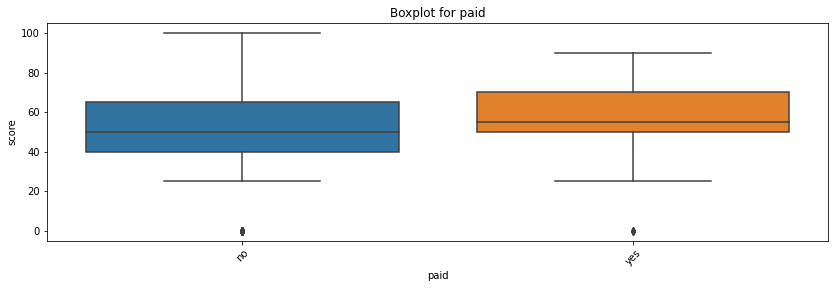

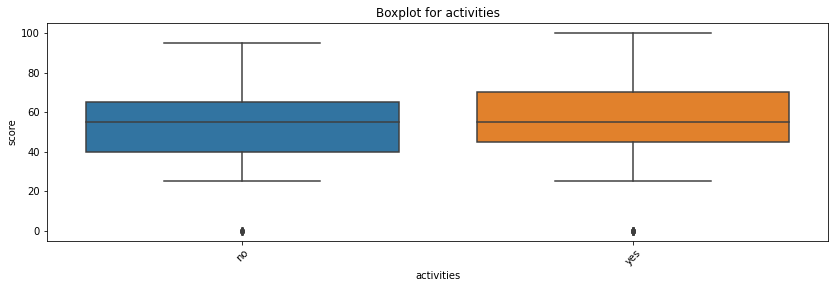

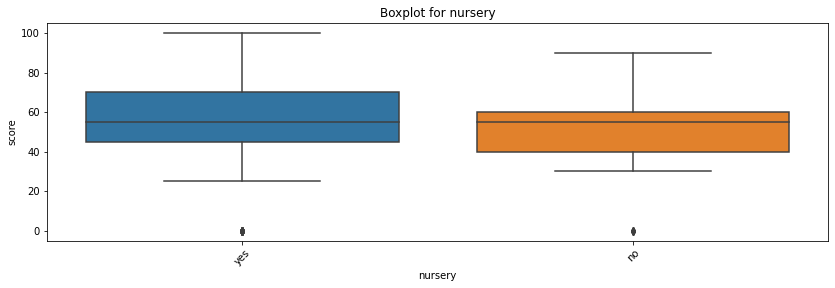

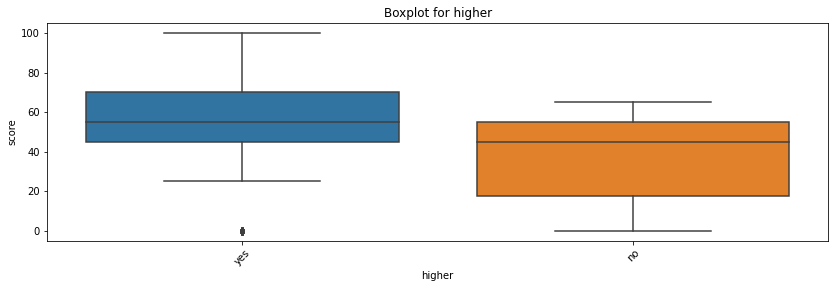

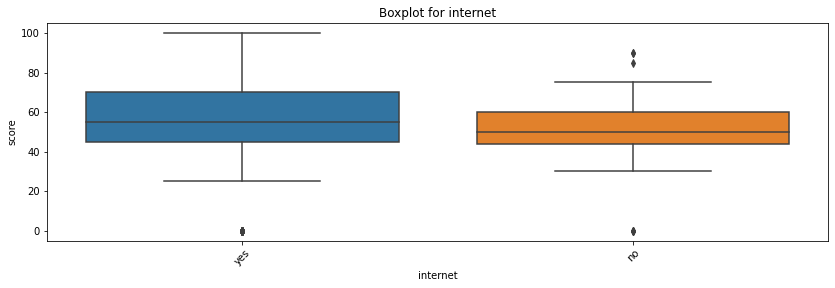

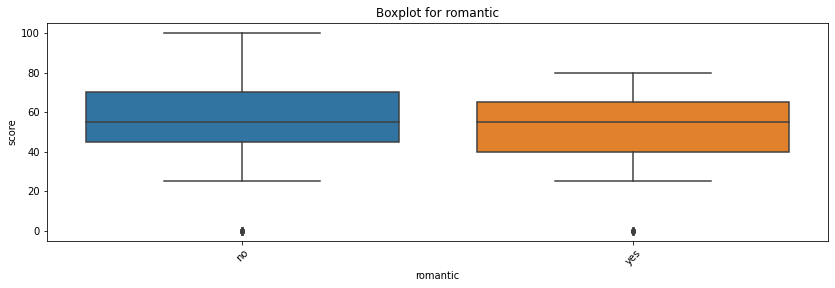

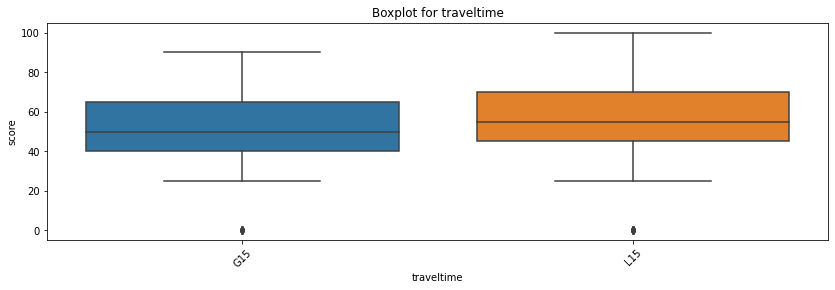

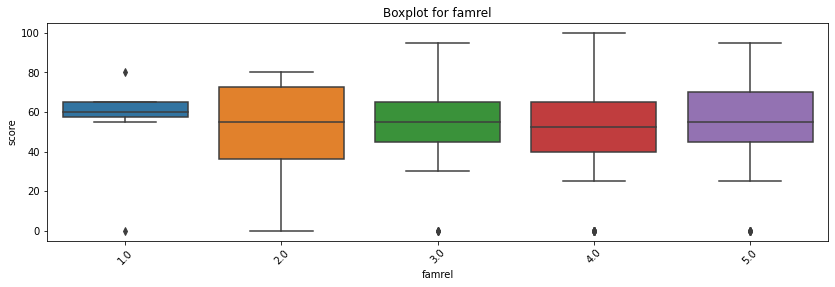

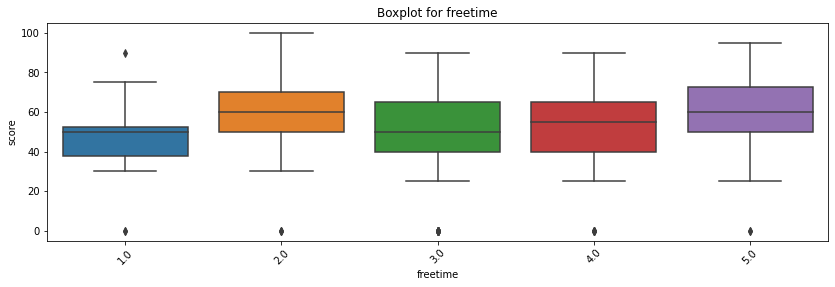

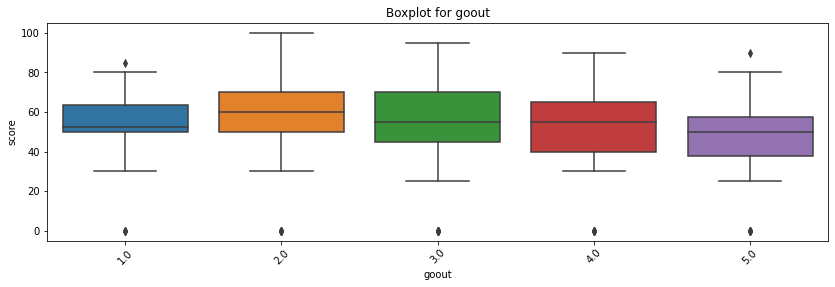

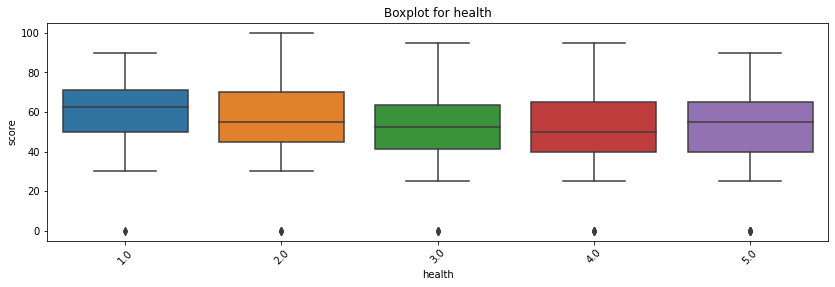

In [41]:
for col in obj_column:
    get_boxplot(col)

In [55]:
for col in obj_column:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки freetime
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки health
